<h1>B09705039_劉惟恩_HW10

In [1]:
#載入所需函示庫
from matplotlib import pyplot as plt
%matplotlib inline
# 設定圖形大小; DPI越大圖越大
plt.rcParams["figure.dpi"] = 100
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as smm
import statsmodels.stats.outliers_influence as sso
import statsmodels

import math
import statistics

<h2>(1) Perform the residual analysis.<br>
(2) Find the outliers and influential observations.<br>
(3) Perform the regression diagnostics (multicollinearity and autocorrelation) analysis.

(For better obsevation, we answer the previous three questions in the same block.)

<h2>17.1

In [2]:
#讀取資料集
df1 = pd.read_excel('Xr17-01.xlsx')

print('Head of dataset:')
display(df1.head())
print("Tail of dataset:")
display(df1.tail())

Head of dataset:


,Price,Lot size,Trees,Distance
0,105.4,41.2,24,42
1,91.2,44.8,5,71
2,183.3,21.3,72,43
3,93.8,43.9,58,14
4,207.5,57.7,52,12


Tail of dataset:


,Price,Lot size,Trees,Distance
55,27.9,40.0,52,84
56,103.5,46.6,26,70
57,107.0,23.2,11,83
58,51.6,46.4,53,44
59,133.4,32.1,55,98


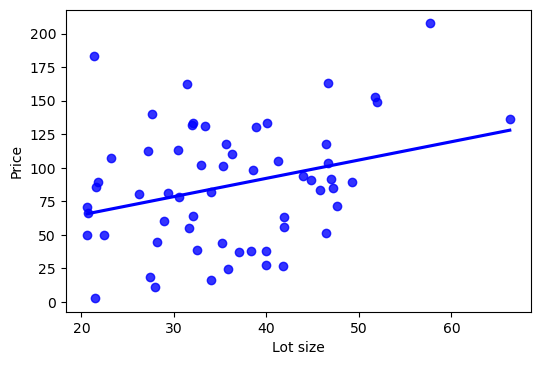

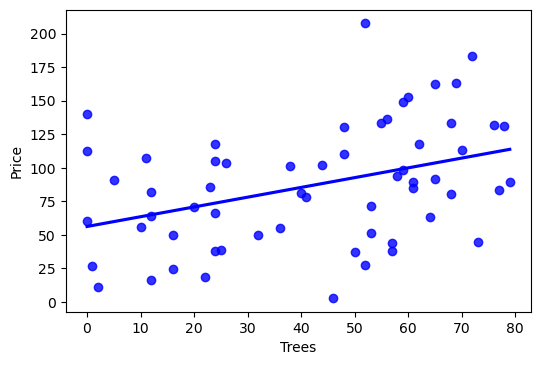

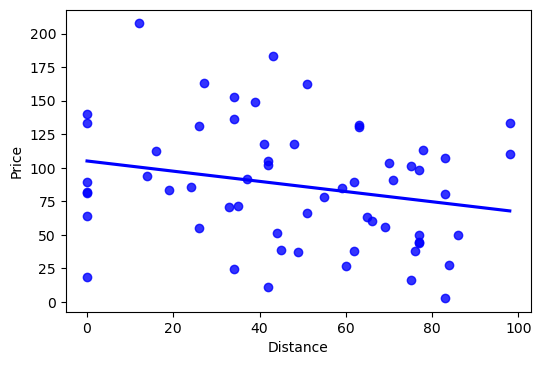

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     5.975
Date:                Wed, 04 May 2022   Prob (F-statistic):            0.00132
Time:                        00:43:04   Log-Likelihood:                -304.76
No. Observations:                  60   AIC:                             617.5
Df Residuals:                      56   BIC:                             625.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.3912     23.517      2.185      0.0

/Users/liuweien/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


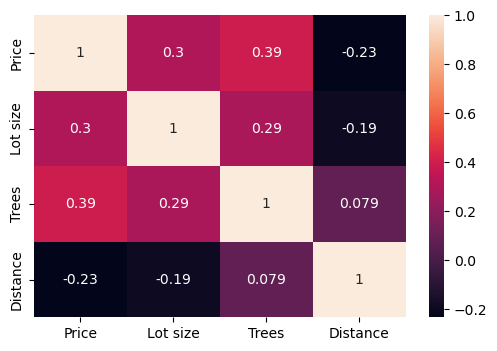

In [3]:
#Scatter Plots
y_var = df1['Price'].values
xnames = ['Lot size', 'Trees', 'Distance']
for aname in xnames:
    x_var = df1[aname].values
    _ = sns.regplot(x = x_var, y = y_var, data = df1, color = 'b', ci = None)
    #_ = plt.plot(x, y, 'o', color = 'b')
    plt.xlabel(aname)
    plt.ylabel('Price')
    plt.show()
    
# Coefficient of Correlation
df1_2 = df1[['Price', 'Lot size', 'Trees', 'Distance']]
corr1 = df1_2.corr()
corr1
_ = sns.heatmap(corr1, annot=True)

y_data = df1['Price']
X_data_ar = np.array([df1['Lot size'], df1['Trees'], df1['Distance']])
X_data_T = X_data_ar.T
X_data = pd.DataFrame(X_data_T,columns = ['Lot size', 'Trees', 'Distance'])
X_data2 = sm.add_constant(X_data)
olsmod = sm.OLS(y_data, X_data2)
result_reg = olsmod.fit()
print(result_reg.summary())

Regression equation:<br>
$Price = 0.6999 Lot size + 0.6788 Trees - 0.3784 Distance + 51.3912$<br>

In [4]:
# Standardized Residuals
st, data, ss2 = sso.summary_table(result_reg, alpha=0.05)
print("Columns in data are: %s" % ss2)
#Predicted value
y_pre = data[:, 2]
#Studentized Residual
SD = data[:, 10]

Columns in data are: ['Obs', 'Dep Var\nPopulation', 'Predicted\nValue', 'Std Error\nMean Predict', 'Mean ci\n95% low', 'Mean ci\n95% upp', 'Predict ci\n95% low', 'Predict ci\n95% upp', 'Residual', 'Std Error\nResidual', 'Student\nResidual', "Cook's\nD"]


<h2>(1) Perform the residual analysis.

Test 1: Normality Test

Hypothesis:<br>
H0: Errors are normally distributed.<br>
H1: Errors are not normally distributed.<br>

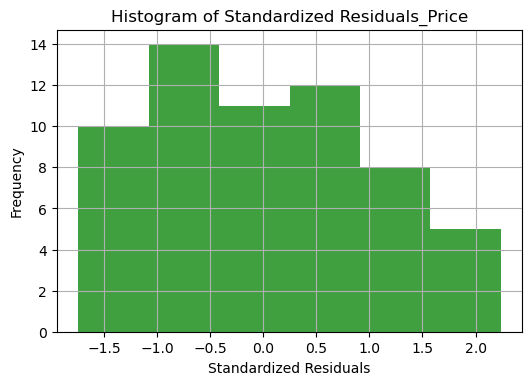

/Users/liuweien/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


 

Chi-squared test: statistics = 2.8333, p-value = 0.2425
Critical value = 5.9915 (defree of freedom = 2)
0.24252107463564856
Shapiro Test
Statistics=0.970, p=0.141


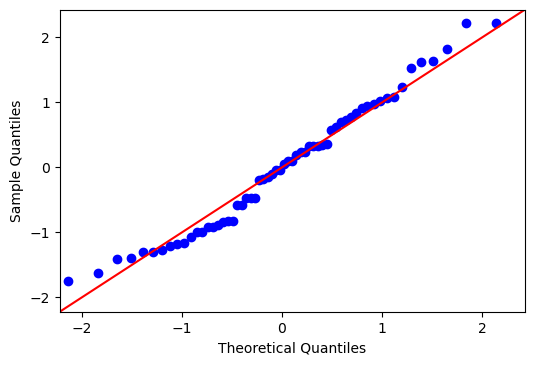

In [5]:
# Test 1: Normality Test
def Chi_Square_for_Normality(stand_res, N, a): 
    m = np.mean(stand_res)
    s = np.std(stand_res)    
    prob_bins = np.zeros((N + 1))
    z_bins = np.zeros((N + 1))
    z_bins[0] = -4
    z_bins[N] = 4
    for i in range(0, N+1):
        prob_bins[i] = i/N
    for j in range(1, N):
        z_bins[j] = m + stats.norm.isf(1 - prob_bins[j]) * s
    counts, bins = np.histogram(stand_res, bins=z_bins)
    nobs = counts.sum()
    prob_e = np.zeros((N))
    for i in range(1, N+1):
        prob_e[i - 1] = prob_bins[i] - prob_bins[i - 1]
    freq_e = nobs * prob_e
    freq_o = counts
    if np.sum(freq_e < 5) > 0:
        print("Rule of five is not met. ")
    else:
        chi_stat, pval = stats.chisquare(freq_o, freq_e)
        chi_pval = stats.chi2.sf(chi_stat, N - 3)
        print("Chi-squared test: statistics = %0.4f, p-value = %0.4f" % (chi_stat, chi_pval))
    df = freq_o.shape[0]-3
    crit_value = stats.chi2.ppf(1 - a, df)
    print("Critical value = %0.4f (defree of freedom = %d)" % (crit_value, df))
    return chi_pval

mu = np.mean(SD)
sigma = np.std(SD)

#_ = plt.hist(SD, bins = 'auto')
fig, ax = plt.subplots()
counts, bins, patches = plt.hist(SD, 6, density=False, facecolor='g', alpha=0.75)
plt.xlabel('Standardized Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Standardized Residuals_Price')
plt.grid(True)
bin_centers = [np.mean(k) for k in zip(bins[:-1], bins[1:])]
plt.show()

fig = sm.qqplot(SD, stats.norm, fit=True, line='45')
print(" \n")

chi2_pval = Chi_Square_for_Normality(SD, 5, 0.05) 
print(chi2_pval)

print('Shapiro Test')
stat, p = stats.shapiro(SD)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Because p_value = 0.2425 > a = 0.05, do not rejected H0. We can assume that errors are normally distributed.

Test 2: Homoscedasticity and Heteroscedasticity:

Hypothesis:<br>
H0: Homoscedasticity<br>
H1: Heteroscedasticity

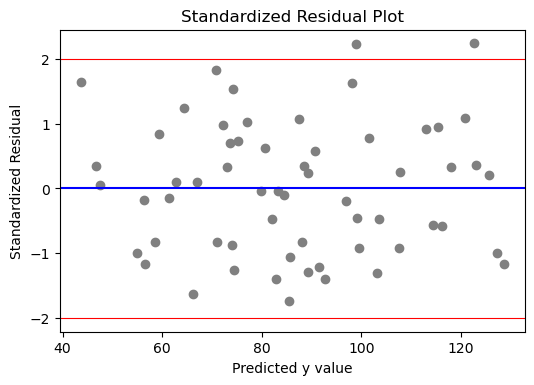

In [6]:
#Test 2: Homoscedasticity and Heteroscedasticity:
plt.plot(y_pre, SD, 'o', color = 'gray')
plt.axhline(y=2, color = 'red', lw = 0.8)
plt.axhline(y=0, color = 'blue')
plt.axhline(y=-2, color = 'red', lw = 0.8)
plt.title('Standardized Residual Plot')
plt.xlabel('Predicted y value')
plt.ylabel('Standardized Residual')
plt.show()

Do not rejected H0. We can assume that the variation is constant and the mean is around 0.

Test 3: Dependence of the Error Variable:<br>

Hypothesis:<br>
H0 : Randomness exists.<br>
H1 : Randomness does not exist.

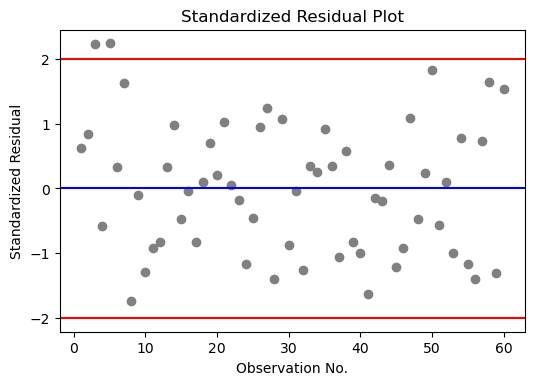

runs =  29
n1 =  30
n2 =  30
runs_exp =  31.0
stan_dev =  3.8400211863822324
z =  -0.5208304597621878
pval_z =  0.6024848821020334
p_value for Z-statistic=  0.6024848821020334


In [7]:
# Test 3: Dependence of the Error Variable:
def runsTest(l, l_median): 
    runs, n1, n2 = 1, 0, 0
    if(l[0]) >= l_median:
        n1 += 1   
    else:
        n2 += 1   
    for i in range(1, len(l)): 
        if (l[i] >= l_median and l[i-1] < l_median) or (l[i] < l_median and l[i-1] >= l_median):
            runs += 1  
        if(l[i]) >= l_median: 
            n1 += 1   
        else: 
            n2 += 1   
    runs_exp = ((2*n1*n2)/(n1+n2)) + 1
    stan_dev = math.sqrt((2*n1*n2*(2*n1*n2-n1-n2))/(((n1+n2)**2)*(n1+n2-1))) 
    z = (runs-runs_exp)/stan_dev
    pval_z = stats.norm.sf(abs(z)) * 2
    print('runs = ', runs)
    print('n1 = ', n1)
    print('n2 = ', n2)
    print('runs_exp = ', runs_exp)
    print('stan_dev = ', stan_dev)
    print('z = ', z)
    print('pval_z = ', pval_z)
    return pval_z

Id1 = data[:, 0]
plt.plot(Id1, SD, 'o', color = 'gray')
plt.axhline(y=0, color = 'blue')
plt.axhline(y=2, color = 'red')
plt.axhline(y=-2, color = 'red')
plt.title('Standardized Residual Plot')
plt.xlabel('Observation No.')
plt.ylabel('Standardized Residual')
plt.show()

SD_median = statistics.median(SD)
Z_pval = runsTest(SD, SD_median)   
print('p_value for Z-statistic= ', Z_pval)

Because p-value = 0.6024848821020334 > a = 0.05, do not reject H0.
There is no evidence to infer that the sample is not random.

All required conditions satisfied.

<h2>(2) Find the outliers and influential observations.

In [8]:
# Outliers
df1_3 = pd.DataFrame(SD,columns = ['SD'])
filter = (df1_3['SD'] < -2) | (df1_3['SD'] > 2)
print("Outliers by SD = \n")
print(df1_3['SD'].loc[filter])

# Influential Observation
H = np.matmul(X_data, np.linalg.solve(np.matmul(X_data.T, X_data), X_data.T))
df1['hii'] = np.diagonal(H)
df1_h = pd.DataFrame(df1['hii'])
k = result_reg.df_model
n = len(df1_h['hii'])
h_level = 3 * (k+1) / n 
print("h_level = ", h_level)
print(" \n")
filter = (df1_h['hii'] > h_level)
print("Influential Observations by hi = \n")
print(df1_h['hii'].loc[filter])

# Cook’s Distance
s2_e = result_reg.mse_resid
k = result_reg.df_model
y_a = data[:, 1]
y_f = data[:, 2]
h_i = df1['hii']
CD_arr = np.square(y_a - y_f) / s2_e / (k - 1) * h_i / np.square(1 - h_i)
CD = np.array(CD_arr)
df1_cd = pd.DataFrame(CD,columns = ['CD'])
display(df1_cd.head())
filter = (df1_cd['CD'] > 1 )
print("Influential Observations by Cook's Distances = \n")
print(df1_cd['CD'].loc[filter])

/var/folders/l7/h_6mpd150zs9sx2xsxvg91_80000gn/T/ipykernel_12866/2384034953.py:8: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  H = np.matmul(X_data, np.linalg.solve(np.matmul(X_data.T, X_data), X_data.T))


Outliers by SD = 

2    2.227621
4    2.238522
Name: SD, dtype: float64
h_level =  0.2
 

Influential Observations by hi = 

Series([], Name: hii, dtype: float64)


,CD
0,0.007288
1,0.040545
2,0.195414
3,0.009448
4,0.254204


Influential Observations by Cook's Distances = 

Series([], Name: CD, dtype: float64)


Outliers ID: 3, 5.<br>
No influential observation.

<h2>(3) Perform the regression diagnostics (multicollinearity and autocorrelation) analysis.

Multicollinearity analysis:

According to the OLS Regression Results chart and the correlation table above.<br>
The model is valid (F-statistic pvalue = 0.00132 < 0.05 rejects null hypothesis, r-squared is 0.242).<br>
Lot size (0.216), Distance (0.058) p-value of T-test rejects null hypothesis, Trees (0.004) p-value of T-test do not rejects null hypothesis.<br>
The sign of the correlations are the same as the coefficents.<br>
Thus, there is no multicollinearity issue in this model.

Two-tail test for First Order Auto-Correlation:<br>
H0: The data are not first-order correlated<br>
H1: The data are first-order correlated

In [9]:
# autocorrelation
def Durbin_Watson_test(x):
    x_square_sum = np.vdot(x, x)
    print("x_square_sum = ", x_square_sum)
    size = x.size
    print("size = ", size)
    x_d = np.zeros((size))
    print("x_d = ", x_d)
    l_size = size - 1
    for i in range(l_size):
        x_d[i + 1] = x[i + 1] - x[i]
    print("x_d = ", x_d)
    d = np.vdot(x_d, x_d) / x_square_sum
    print("d = ", d)
    return(d)

d_w = Durbin_Watson_test(SD)
print(d_w)

x_square_sum =  60.389033869657645
size =  60
x_d =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x_d =  [ 0.          0.21681114  1.38392769 -2.79995485  2.81085547 -1.90028362
  1.2898011  -3.37066134  1.63935944 -1.19231335  0.37848942  0.09271198
  1.15158396  0.65913125 -1.4549664   0.43194036 -0.78540052  0.92524969
  0.60184696 -0.50422216  0.82231958 -0.96715857 -0.22734985 -1.00176246
  0.70935147  1.41420182  0.29749328 -2.642224    2.47192084 -1.95816729
  0.84323978 -1.22684923  1.60330381 -0.09030467  0.66873659 -0.5667618
 -1.41310771  1.63875129 -1.41039343 -0.15840714 -0.64014695  1.4871501
 -0.04321562  0.5480084  -1.57136746  0.28985031  2.01473851 -1.55956789
  0.70686754  1.59423674 -2.40441221  0.66563424 -1.08613913  1.77225212
 -1.94995537 -0.23565564  2.13612725  0.91108422 -2.94849982  2.83701611]
d =  2.1650567787398325
2.1

(T = 60, K = 3, alpha = 0.025): dl = 1.4377 , du = 1.5735<br>
2 < d = 2.1650567787398325 < 2.4265(4 - du). Thus, there is not enough evidence to infer that first order auto-correlation exists.

<h2>17.9

In [10]:
#讀取資料集
df1 = pd.read_excel('Xr17-09.xlsx')

print('Head of dataset:')
display(df1.head())
print("Tail of dataset:")
display(df1.tail())

Head of dataset:


/Users/liuweien/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,Test Score,Math Degree,Age,Income
0,73.9,77,52,44.4
1,59.4,48,32,49.0
2,64.6,33,50,52.6
3,59.8,25,43,39.6
4,58.8,25,40,40.7


Tail of dataset:


,Test Score,Math Degree,Age,Income
35,71.7,57,59,55.1
36,68.8,41,40,33.7
37,45.0,27,40,19.8
38,61.9,37,44,48.2
39,56.0,36,56,55.9


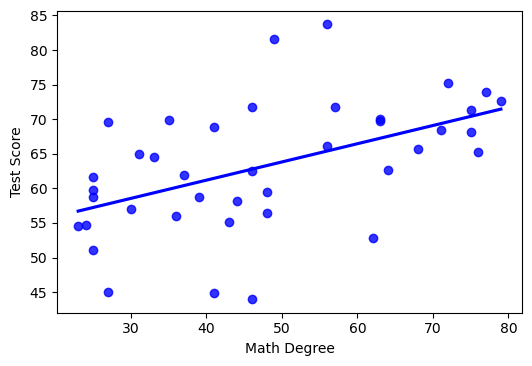

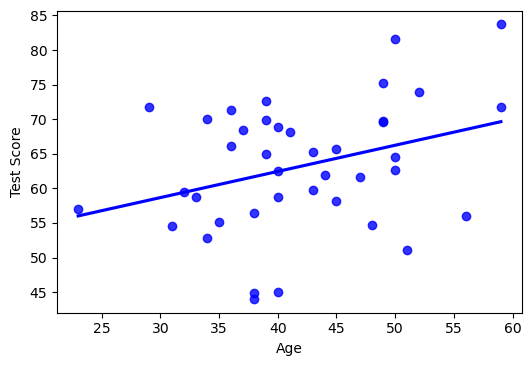

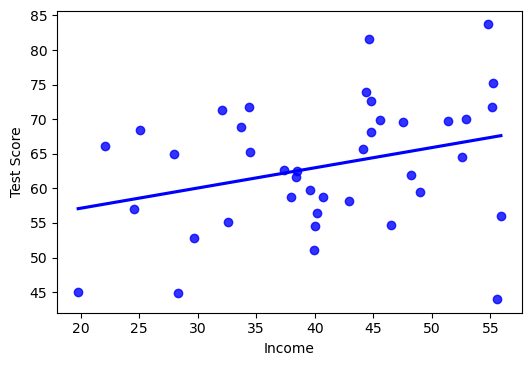

                            OLS Regression Results                            
Dep. Variable:             Test Score   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     6.663
Date:                Wed, 04 May 2022   Prob (F-statistic):            0.00108
Time:                        00:43:04   Log-Likelihood:                -136.43
No. Observations:                  40   AIC:                             280.9
Df Residuals:                      36   BIC:                             287.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          35.6776      7.279      4.902      

/Users/liuweien/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


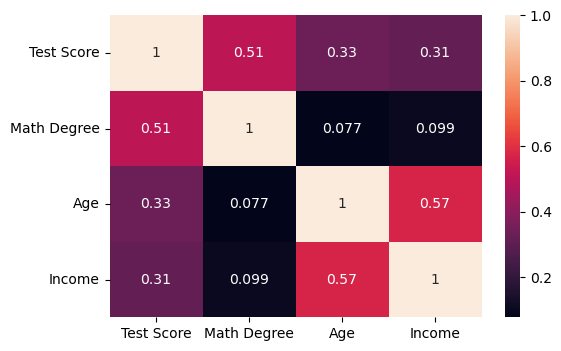

In [11]:
#Scatter Plots
y_var = df1['Test Score'].values
xnames = ['Math Degree', 'Age', 'Income']
for aname in xnames:
    x_var = df1[aname].values
    _ = sns.regplot(x = x_var, y = y_var, data = df1, color = 'b', ci = None)
    #_ = plt.plot(x, y, 'o', color = 'b')
    plt.xlabel(aname)
    plt.ylabel('Test Score')
    plt.show()
    
# Coefficient of Correlation
df1_2 = df1[['Test Score', 'Math Degree', 'Age', 'Income']]
corr1 = df1_2.corr()
corr1
_ = sns.heatmap(corr1, annot=True)

y_data = df1['Test Score']
X_data_ar = np.array([df1['Math Degree'], df1['Age'], df1['Income']])
X_data_T = X_data_ar.T
X_data = pd.DataFrame(X_data_T,columns = ['Math Degree', 'Age', 'Income'])
X_data2 = sm.add_constant(X_data)
olsmod = sm.OLS(y_data, X_data2)
result_reg = olsmod.fit()
print(result_reg.summary())

Regression equation:<br>
$Test Score = 0.2475 Math Degree + 0.2448 Age + 0.1333 Income + 35.6776$<br>

In [12]:
# Standardized Residuals
st, data, ss2 = sso.summary_table(result_reg, alpha=0.05)
print("Columns in data are: %s" % ss2)
#Predicted value
y_pre = data[:, 2]
#Studentized Residual
SD = data[:, 10]

Columns in data are: ['Obs', 'Dep Var\nPopulation', 'Predicted\nValue', 'Std Error\nMean Predict', 'Mean ci\n95% low', 'Mean ci\n95% upp', 'Predict ci\n95% low', 'Predict ci\n95% upp', 'Residual', 'Std Error\nResidual', 'Student\nResidual', "Cook's\nD"]


<h2>(1) Perform the residual analysis.

Test 1: Normality Test

Hypothesis:<br>
H0: Errors are normally distributed.<br>
H1: Errors are not normally distributed.<br>

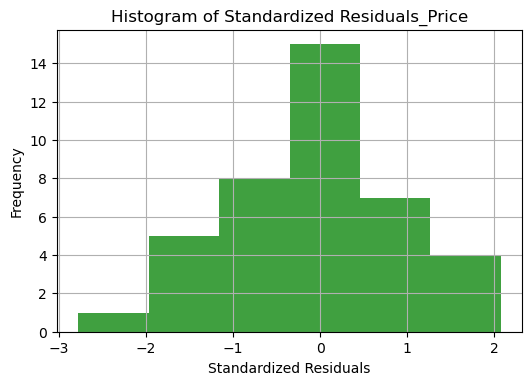

/Users/liuweien/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


 

Chi-squared test: statistics = 1.0000, p-value = 0.6065
Critical value = 5.9915 (defree of freedom = 2)
0.6065306597126339
Shapiro Test
Statistics=0.982, p=0.761


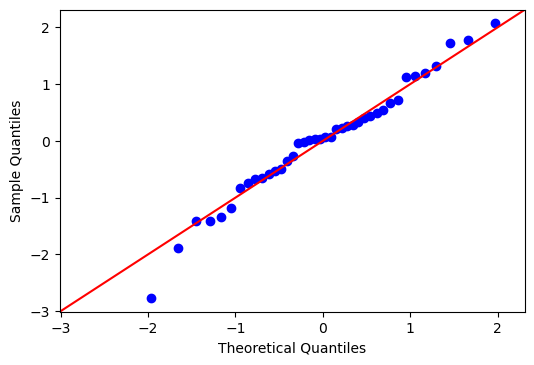

In [13]:
# Test 1: Normality Test
def Chi_Square_for_Normality(stand_res, N, a): 
    m = np.mean(stand_res)
    s = np.std(stand_res)    
    prob_bins = np.zeros((N + 1))
    z_bins = np.zeros((N + 1))
    z_bins[0] = -4
    z_bins[N] = 4
    for i in range(0, N+1):
        prob_bins[i] = i/N
    for j in range(1, N):
        z_bins[j] = m + stats.norm.isf(1 - prob_bins[j]) * s
    counts, bins = np.histogram(stand_res, bins=z_bins)
    nobs = counts.sum()
    prob_e = np.zeros((N))
    for i in range(1, N+1):
        prob_e[i - 1] = prob_bins[i] - prob_bins[i - 1]
    freq_e = nobs * prob_e
    freq_o = counts
    if np.sum(freq_e < 5) > 0:
        print("Rule of five is not met. ")
    else:
        chi_stat, pval = stats.chisquare(freq_o, freq_e)
        chi_pval = stats.chi2.sf(chi_stat, N - 3)
        print("Chi-squared test: statistics = %0.4f, p-value = %0.4f" % (chi_stat, chi_pval))
    df = freq_o.shape[0]-3
    crit_value = stats.chi2.ppf(1 - a, df)
    print("Critical value = %0.4f (defree of freedom = %d)" % (crit_value, df))
    return chi_pval

mu = np.mean(SD)
sigma = np.std(SD)

#_ = plt.hist(SD, bins = 'auto')
fig, ax = plt.subplots()
counts, bins, patches = plt.hist(SD, 6, density=False, facecolor='g', alpha=0.75)
plt.xlabel('Standardized Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Standardized Residuals_Price')
plt.grid(True)
bin_centers = [np.mean(k) for k in zip(bins[:-1], bins[1:])]
plt.show()

fig = sm.qqplot(SD, stats.norm, fit=True, line='45')
print(" \n")

chi2_pval = Chi_Square_for_Normality(SD, 5, 0.05) 
print(chi2_pval)

print('Shapiro Test')
stat, p = stats.shapiro(SD)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Because p_value = 0.6065 > a = 0.05, do not rejected H0. We can assume that errors are normally distributed.

Test 2: Homoscedasticity and Heteroscedasticity:

Hypothesis:<br>
H0: Homoscedasticity<br>
H1: Heteroscedasticity

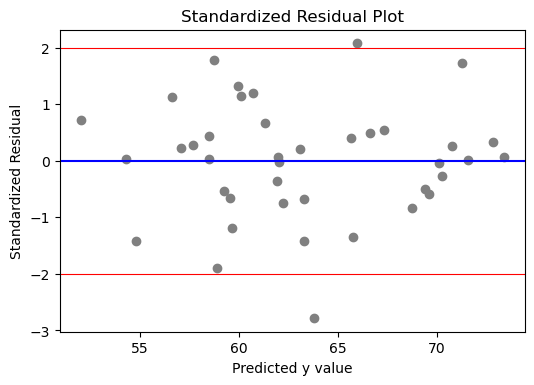

In [14]:
#Test 2: Homoscedasticity and Heteroscedasticity:
plt.plot(y_pre, SD, 'o', color = 'gray')
plt.axhline(y=2, color = 'red', lw = 0.8)
plt.axhline(y=0, color = 'blue')
plt.axhline(y=-2, color = 'red', lw = 0.8)
plt.title('Standardized Residual Plot')
plt.xlabel('Predicted y value')
plt.ylabel('Standardized Residual')
plt.show()

Do not rejected H0. We can assume that the variation is constant and the mean is around 0.

Test 3: Dependence of the Error Variable:<br>

Hypothesis:<br>
H0 : Randomness exists.<br>
H1 : Randomness does not exist.

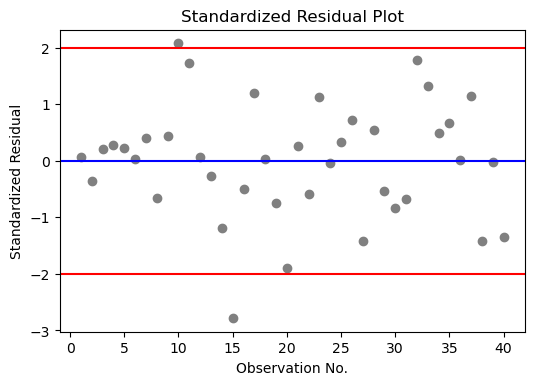

runs =  22
n1 =  20
n2 =  20
runs_exp =  21.0
stan_dev =  3.1214723679042464
z =  0.3203616377585937
pval_z =  0.7486942029213925
p_value for Z-statistic=  0.7486942029213925


In [15]:
# Test 3: Dependence of the Error Variable:
def runsTest(l, l_median): 
    runs, n1, n2 = 1, 0, 0
    if(l[0]) >= l_median:
        n1 += 1   
    else:
        n2 += 1   
    for i in range(1, len(l)): 
        if (l[i] >= l_median and l[i-1] < l_median) or (l[i] < l_median and l[i-1] >= l_median):
            runs += 1  
        if(l[i]) >= l_median: 
            n1 += 1   
        else: 
            n2 += 1   
    runs_exp = ((2*n1*n2)/(n1+n2)) + 1
    stan_dev = math.sqrt((2*n1*n2*(2*n1*n2-n1-n2))/(((n1+n2)**2)*(n1+n2-1))) 
    z = (runs-runs_exp)/stan_dev
    pval_z = stats.norm.sf(abs(z)) * 2
    print('runs = ', runs)
    print('n1 = ', n1)
    print('n2 = ', n2)
    print('runs_exp = ', runs_exp)
    print('stan_dev = ', stan_dev)
    print('z = ', z)
    print('pval_z = ', pval_z)
    return pval_z

Id1 = data[:, 0]
plt.plot(Id1, SD, 'o', color = 'gray')
plt.axhline(y=0, color = 'blue')
plt.axhline(y=2, color = 'red')
plt.axhline(y=-2, color = 'red')
plt.title('Standardized Residual Plot')
plt.xlabel('Observation No.')
plt.ylabel('Standardized Residual')
plt.show()

SD_median = statistics.median(SD)
Z_pval = runsTest(SD, SD_median)   
print('p_value for Z-statistic= ', Z_pval)

Because p-value = 0.7486942029213925 > a = 0.05, do not reject H0.
There is no evidence to infer that the sample is not random.

All required conditions satisfied.

<h2>(2) Find the outliers and influential observations.

In [16]:
# Outliers
df1_3 = pd.DataFrame(SD,columns = ['SD'])
filter = (df1_3['SD'] < -2) | (df1_3['SD'] > 2)
print("Outliers by SD = \n")
print(df1_3['SD'].loc[filter])

# Influential Observation
H = np.matmul(X_data, np.linalg.solve(np.matmul(X_data.T, X_data), X_data.T))
df1['hii'] = np.diagonal(H)
df1_h = pd.DataFrame(df1['hii'])
k = result_reg.df_model
n = len(df1_h['hii'])
h_level = 3 * (k+1) / n 
print("h_level = ", h_level)
print(" \n")
filter = (df1_h['hii'] > h_level)
print("Influential Observations by hi = \n")
print(df1_h['hii'].loc[filter])

# Cook’s Distance
s2_e = result_reg.mse_resid
k = result_reg.df_model
y_a = data[:, 1]
y_f = data[:, 2]
h_i = df1['hii']
CD_arr = np.square(y_a - y_f) / s2_e / (k - 1) * h_i / np.square(1 - h_i)
CD = np.array(CD_arr)
df1_cd = pd.DataFrame(CD,columns = ['CD'])
display(df1_cd.head())
filter = (df1_cd['CD'] > 1 )
print("Influential Observations by Cook's Distances = \n")
print(df1_cd['CD'].loc[filter])

Outliers by SD = 

9     2.074197
14   -2.780774
Name: SD, dtype: float64
h_level =  0.3
 

Influential Observations by hi = 

Series([], Name: hii, dtype: float64)


/var/folders/l7/h_6mpd150zs9sx2xsxvg91_80000gn/T/ipykernel_12866/2384034953.py:8: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  H = np.matmul(X_data, np.linalg.solve(np.matmul(X_data.T, X_data), X_data.T))


,CD
0,0.000218
1,0.009770
2,0.001821
3,0.002551
4,0.001413


Influential Observations by Cook's Distances = 

Series([], Name: CD, dtype: float64)


Outliers ID: 10, 15.<br>
No influential observation.

<h2>(3) Perform the regression diagnostics (multicollinearity and autocorrelation) analysis.

Multicollinearity analysis:

According to the OLS Regression Results chart and the correlation table above.<br>
The model is valid (F-statistic pvalue = 0.00108 < 0.05 rejects null hypothesis, r-squared is 0.357).<br>
Age (0.195), Income (0.389) p-value of T-test rejects null hypothesis, Math Degree (0.001) p-value of T-test do not rejects null hypothesis.<br>
The sign of the correlations are the same as the coefficents.<br>
Thus, there is no multicollinearity issue in this model.

Two-tail test for First Order Auto-Correlation:<br>
H0: The data are not first-order correlated<br>
H1: The data are first-order correlated

In [17]:
# autocorrelation
def Durbin_Watson_test(x):
    x_square_sum = np.vdot(x, x)
    print("x_square_sum = ", x_square_sum)
    size = x.size
    print("size = ", size)
    x_d = np.zeros((size))
    print("x_d = ", x_d)
    l_size = size - 1
    for i in range(l_size):
        x_d[i + 1] = x[i + 1] - x[i]
    print("x_d = ", x_d)
    d = np.vdot(x_d, x_d) / x_square_sum
    print("d = ", d)
    return(d)

d_w = Durbin_Watson_test(SD)
print(d_w)

x_square_sum =  40.29995508913042
size =  40
x_d =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
x_d =  [ 0.         -0.42666766  0.55857117  0.08184525 -0.05524239 -0.20007232
  0.36910913 -1.06012022  1.09634776  1.63859862 -0.34037848 -1.6664789
 -0.34572413 -0.90420035 -1.59818918  2.28631992  1.70077736 -1.17724678
 -0.78199552 -1.13996736  2.1484994  -0.84879961  1.716043   -1.16545085
  0.38015417  0.37780361 -2.13651839  1.9675614  -1.08200189 -0.30394651
  0.16887449  2.44537126 -0.44748741 -0.83111399  0.17159013 -0.65004061
  1.13170802 -2.56813872  1.40124213 -1.33563291]
d =  1.5407682372137976
1.5407682372137976


(T = 40, K = 3, alpha = 0.025): dl = 1.3001 , du = 1.5057<br>
du < d = 1.5407682372137976 < 2. Thus, there is not enough evidence to infer that first order auto-correlation exists.

<h2>17.15

In [18]:
#讀取資料集
df1 = pd.read_excel('Xr17-15.xlsx')

print('Head of dataset:')
display(df1.head())
print("Tail of dataset:")
display(df1.tail())

Head of dataset:


,DEFINITE,AGE,EDUC,INCOME
0,10,34,13,127500
1,10,58,12,16000
2,10,39,16,32500
3,5,49,12,23500
4,10,72,16,82500


Tail of dataset:


,DEFINITE,AGE,EDUC,INCOME
1657,6,33,12,27500
1658,2,28,12,8750
1659,8,39,13,42500
1660,8,64,12,175000
1661,1,34,10,1500


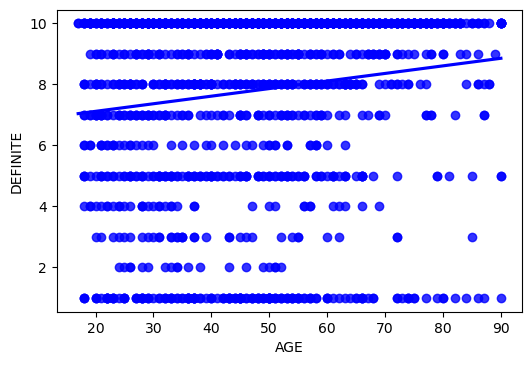

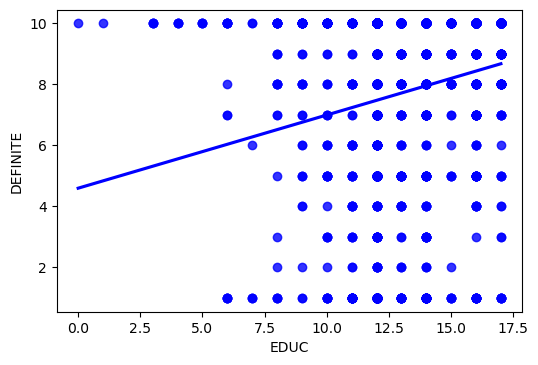

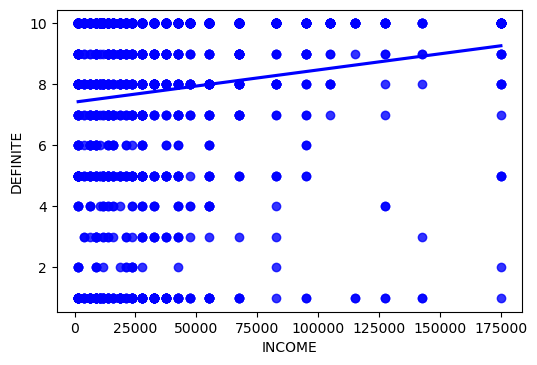

                            OLS Regression Results                            
Dep. Variable:               DEFINITE   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     41.92
Date:                Wed, 04 May 2022   Prob (F-statistic):           4.15e-26
Time:                        00:43:05   Log-Likelihood:                -4116.4
No. Observations:                1662   AIC:                             8241.
Df Residuals:                    1658   BIC:                             8263.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0230      0.461      6.553      0.0

/Users/liuweien/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


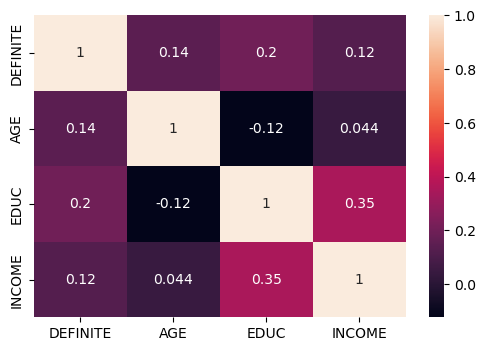

In [19]:
#Scatter Plots
y_var = df1['DEFINITE'].values
xnames = ['AGE', 'EDUC', 'INCOME']
for aname in xnames:
    x_var = df1[aname].values
    _ = sns.regplot(x = x_var, y = y_var, data = df1, color = 'b', ci = None)
    #_ = plt.plot(x, y, 'o', color = 'b')
    plt.xlabel(aname)
    plt.ylabel('DEFINITE')
    plt.show()
    
# Coefficient of Correlation
df1_2 = df1[['DEFINITE', 'AGE', 'EDUC', 'INCOME']]
corr1 = df1_2.corr()
corr1
_ = sns.heatmap(corr1, annot=True)

y_data = df1['DEFINITE']
X_data_ar = np.array([df1['AGE'], df1['EDUC'], df1['INCOME']])
X_data_T = X_data_ar.T
X_data = pd.DataFrame(X_data_T,columns = ['AGE', 'EDUC', 'INCOME'])
X_data2 = sm.add_constant(X_data)
olsmod = sm.OLS(y_data, X_data2)
result_reg = olsmod.fit()
print(result_reg.summary())

Regression equation:<br>
$DEFINITE = 0.0289 AGE + 0.2461 EDUC + 3.745e-06 INCOME + 3.0230$<br>

In [20]:
# Standardized Residuals
st, data, ss2 = sso.summary_table(result_reg, alpha=0.05)
print("Columns in data are: %s" % ss2)
#Predicted value
y_pre = data[:, 2]
#Studentized Residual
SD = data[:, 10]

Columns in data are: ['Obs', 'Dep Var\nPopulation', 'Predicted\nValue', 'Std Error\nMean Predict', 'Mean ci\n95% low', 'Mean ci\n95% upp', 'Predict ci\n95% low', 'Predict ci\n95% upp', 'Residual', 'Std Error\nResidual', 'Student\nResidual', "Cook's\nD"]


<h2>(1) Perform the residual analysis.

Test 1: Normality Test

Hypothesis:<br>
H0: Errors are normally distributed.<br>
H1: Errors are not normally distributed.<br>

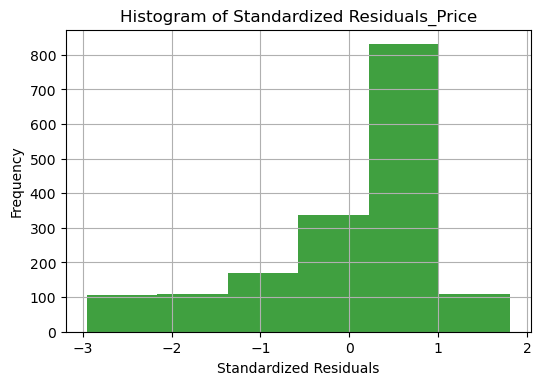

 

Chi-squared test: statistics = 496.5860, p-value = 0.0000
Critical value = 5.9915 (defree of freedom = 2)
1.471334167447568e-108
Shapiro Test
Statistics=0.868, p=0.000


/Users/liuweien/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


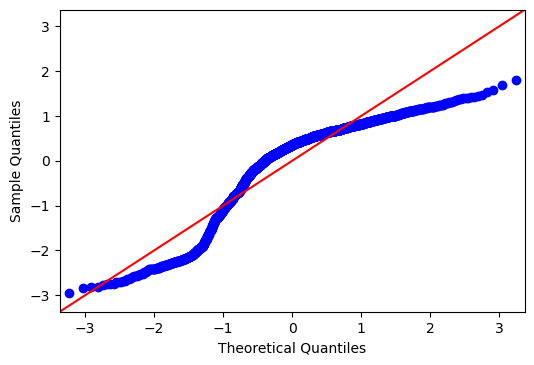

In [21]:
# Test 1: Normality Test
def Chi_Square_for_Normality(stand_res, N, a): 
    m = np.mean(stand_res)
    s = np.std(stand_res)    
    prob_bins = np.zeros((N + 1))
    z_bins = np.zeros((N + 1))
    z_bins[0] = -4
    z_bins[N] = 4
    for i in range(0, N+1):
        prob_bins[i] = i/N
    for j in range(1, N):
        z_bins[j] = m + stats.norm.isf(1 - prob_bins[j]) * s
    counts, bins = np.histogram(stand_res, bins=z_bins)
    nobs = counts.sum()
    prob_e = np.zeros((N))
    for i in range(1, N+1):
        prob_e[i - 1] = prob_bins[i] - prob_bins[i - 1]
    freq_e = nobs * prob_e
    freq_o = counts
    if np.sum(freq_e < 5) > 0:
        print("Rule of five is not met. ")
    else:
        chi_stat, pval = stats.chisquare(freq_o, freq_e)
        chi_pval = stats.chi2.sf(chi_stat, N - 3)
        print("Chi-squared test: statistics = %0.4f, p-value = %0.4f" % (chi_stat, chi_pval))
    df = freq_o.shape[0]-3
    crit_value = stats.chi2.ppf(1 - a, df)
    print("Critical value = %0.4f (defree of freedom = %d)" % (crit_value, df))
    return chi_pval

mu = np.mean(SD)
sigma = np.std(SD)

#_ = plt.hist(SD, bins = 'auto')
fig, ax = plt.subplots()
counts, bins, patches = plt.hist(SD, 6, density=False, facecolor='g', alpha=0.75)
plt.xlabel('Standardized Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Standardized Residuals_Price')
plt.grid(True)
bin_centers = [np.mean(k) for k in zip(bins[:-1], bins[1:])]
plt.show()

fig = sm.qqplot(SD, stats.norm, fit=True, line='45')
print(" \n")

chi2_pval = Chi_Square_for_Normality(SD, 5, 0.05) 
print(chi2_pval)

print('Shapiro Test')
stat, p = stats.shapiro(SD)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Because p_value = 0.0000 < a = 0.05, rejected H0 in favor H1. We cannot assume that errors are normally distributed.

Test 2: Homoscedasticity and Heteroscedasticity:

Hypothesis:<br>
H0: Homoscedasticity<br>
H1: Heteroscedasticity

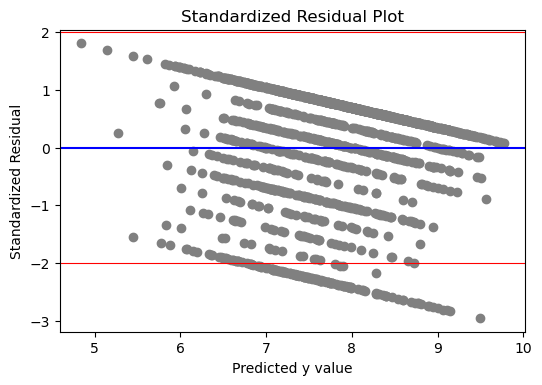

In [22]:
#Test 2: Homoscedasticity and Heteroscedasticity:
plt.plot(y_pre, SD, 'o', color = 'gray')
plt.axhline(y=2, color = 'red', lw = 0.8)
plt.axhline(y=0, color = 'blue')
plt.axhline(y=-2, color = 'red', lw = 0.8)
plt.title('Standardized Residual Plot')
plt.xlabel('Predicted y value')
plt.ylabel('Standardized Residual')
plt.show()

Rejected H0, in favor H1. We cannot assume that the variation is constant and the mean is around 0.

Test 3: Dependence of the Error Variable:<br>

Hypothesis:<br>
H0 : Randomness exists.<br>
H1 : Randomness does not exist.

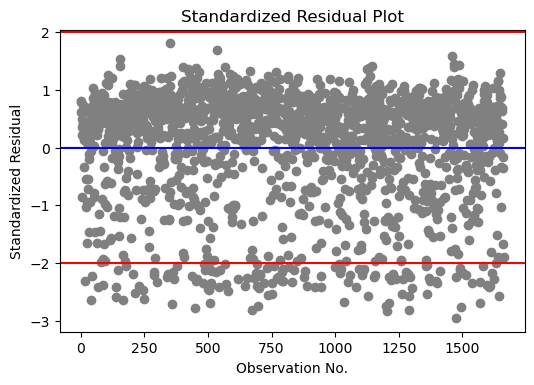

runs =  790
n1 =  831
n2 =  831
runs_exp =  832.0
stan_dev =  20.377680179261333
z =  -2.061078573739911
pval_z =  0.039295544570332935
p_value for Z-statistic=  0.039295544570332935


In [23]:
# Test 3: Dependence of the Error Variable:
def runsTest(l, l_median): 
    runs, n1, n2 = 1, 0, 0
    if(l[0]) >= l_median:
        n1 += 1   
    else:
        n2 += 1   
    for i in range(1, len(l)): 
        if (l[i] >= l_median and l[i-1] < l_median) or (l[i] < l_median and l[i-1] >= l_median):
            runs += 1  
        if(l[i]) >= l_median: 
            n1 += 1   
        else: 
            n2 += 1   
    runs_exp = ((2*n1*n2)/(n1+n2)) + 1
    stan_dev = math.sqrt((2*n1*n2*(2*n1*n2-n1-n2))/(((n1+n2)**2)*(n1+n2-1))) 
    z = (runs-runs_exp)/stan_dev
    pval_z = stats.norm.sf(abs(z)) * 2
    print('runs = ', runs)
    print('n1 = ', n1)
    print('n2 = ', n2)
    print('runs_exp = ', runs_exp)
    print('stan_dev = ', stan_dev)
    print('z = ', z)
    print('pval_z = ', pval_z)
    return pval_z

Id1 = data[:, 0]
plt.plot(Id1, SD, 'o', color = 'gray')
plt.axhline(y=0, color = 'blue')
plt.axhline(y=2, color = 'red')
plt.axhline(y=-2, color = 'red')
plt.title('Standardized Residual Plot')
plt.xlabel('Observation No.')
plt.ylabel('Standardized Residual')
plt.show()

SD_median = statistics.median(SD)
Z_pval = runsTest(SD, SD_median)   
print('p_value for Z-statistic= ', Z_pval)

Because p-value = 0.039295544570332935 < a = 0.05, reject H0 in favor H1.
There is evidence to infer that the sample is not random.

The three tests all failed, this is an invalid bad model.

<h2>(2) Find the outliers and influential observations.

In [24]:
# Outliers
df1_3 = pd.DataFrame(SD,columns = ['SD'])
filter = (df1_3['SD'] < -2) | (df1_3['SD'] > 2)
print("Outliers by SD = \n")
print(df1_3['SD'].loc[filter])

# Influential Observation
H = np.matmul(X_data, np.linalg.solve(np.matmul(X_data.T, X_data), X_data.T))
df1['hii'] = np.diagonal(H)
df1_h = pd.DataFrame(df1['hii'])
k = result_reg.df_model
n = len(df1_h['hii'])
h_level = 3 * (k+1) / n 
print("h_level = ", h_level)
print(" \n")
filter = (df1_h['hii'] > h_level)
print("Influential Observations by hi = \n")
print(df1_h['hii'].loc[filter])

# Cook’s Distance
s2_e = result_reg.mse_resid
k = result_reg.df_model
y_a = data[:, 1]
y_f = data[:, 2]
h_i = df1['hii']
CD_arr = np.square(y_a - y_f) / s2_e / (k - 1) * h_i / np.square(1 - h_i)
CD = np.array(CD_arr)
df1_cd = pd.DataFrame(CD,columns = ['CD'])
display(df1_cd.head())
filter = (df1_cd['CD'] > 1 )
print("Influential Observations by Cook's Distances = \n")
print(df1_cd['CD'].loc[filter])

Outliers by SD = 

16     -2.303182
40     -2.638256
44     -2.227524
67     -2.412942
87     -2.384356
          ...   
1604   -2.420801
1609   -2.393871
1616   -2.174038
1622   -2.283406
1644   -2.567490
Name: SD, Length: 140, dtype: float64
h_level =  0.007220216606498195
 

Influential Observations by hi = 

57      0.011010
63      0.010387
140     0.010361
154     0.012414
168     0.013081
176     0.011402
186     0.010571
187     0.011760
221     0.012504
226     0.008165
253     0.010345
282     0.012484
300     0.011622
306     0.010424
414     0.010342
465     0.008117
470     0.010204
488     0.007587
562     0.010817
565     0.011624
628     0.010359
911     0.010268
977     0.010846
1030    0.010184
1124    0.007253
1169    0.010075
1178    0.010176
1288    0.010359
1291    0.012795
1336    0.010086
1406    0.012045
1407    0.011054
1439    0.011110
1449    0.010704
1546    0.011344
1605    0.012283
1617    0.010151
1631    0.010954
1660    0.012484
Name: hii, dtype: float

/var/folders/l7/h_6mpd150zs9sx2xsxvg91_80000gn/T/ipykernel_12866/2384034953.py:8: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  H = np.matmul(X_data, np.linalg.solve(np.matmul(X_data.T, X_data), X_data.T))


,CD
0,0.001746
1,0.000335
2,0.000242
3,0.000230
4,0.000055


Influential Observations by Cook's Distances = 

Series([], Name: CD, dtype: float64)


There are lots of Outliers, there ID is the first number + 1 in every row.<br>
There are lots of influential observation, there ID is the first number + 1 in every row.

<h2>(3) Perform the regression diagnostics (multicollinearity and autocorrelation) analysis.

Multicollinearity analysis:

According to the OLS Regression Results chart and the correlation table above.<br>
The model is valid (F-statistic pvalue = 4.15e-26 < 0.05 rejects null hypothesis, r-squared is 0.070).<br>
INCOME (0.086) p-value of T-test rejects null hypothesis, AGE (0.000), EDUC (0.000) p-value of T-test do not rejects null hypothesis.<br>
The sign of the correlations are the same as the coefficents.<br>
Thus, there is no multicollinearity issue in this model.

Two-tail test for First Order Auto-Correlation:<br>
H0: The data are not first-order correlated<br>
H1: The data are first-order correlated

In [25]:
# autocorrelation
def Durbin_Watson_test(x):
    x_square_sum = np.vdot(x, x)
    print("x_square_sum = ", x_square_sum)
    size = x.size
    print("size = ", size)
    x_d = np.zeros((size))
    print("x_d = ", x_d)
    l_size = size - 1
    for i in range(l_size):
        x_d[i + 1] = x[i + 1] - x[i]
    print("x_d = ", x_d)
    d = np.vdot(x_d, x_d) / x_square_sum
    print("d = ", d)
    return(d)

d_w = Durbin_Watson_test(SD)
print(d_w)

x_square_sum =  1661.9495893511346
size =  1662
x_d =  [0. 0. 0. ... 0. 0. 0.]
x_d =  [ 0.         -0.01260683 -0.17228035 ...  1.84274174 -0.33860249
 -1.73167186]
d =  1.8749060503640806
1.8749060503640806


(T = 1662, K = 3, alpha = 0.025): dl = 1.882 du = 1.889<br>
0 < d = 1.8749060503640806 < dl. Thus, there is enough evidence to infer that first order auto-correlation exists.

<h2>17.53

In [26]:
#讀取資料集
df1 = pd.read_excel('Xr17-53.xlsx')

print('Head of dataset:')
display(df1.head())
print("Tail of dataset:")
display(df1.tail())

Head of dataset:


/Users/liuweien/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,Y,X1,X2
0,933,16,60
1,973,10,68
2,677,15,66
3,468,16,38
4,880,15,57


Tail of dataset:


,Y,X1,X2
95,2076,16,93
96,1444,18,74
97,1532,10,57
98,1837,12,78
99,1431,19,32


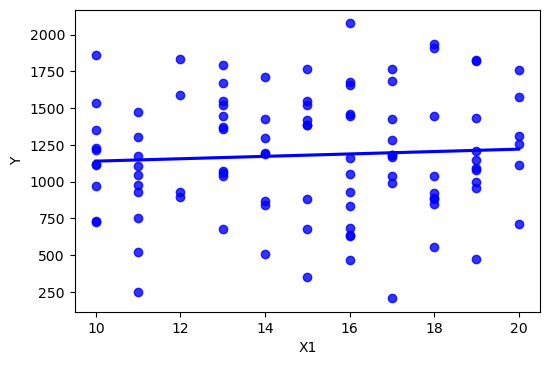

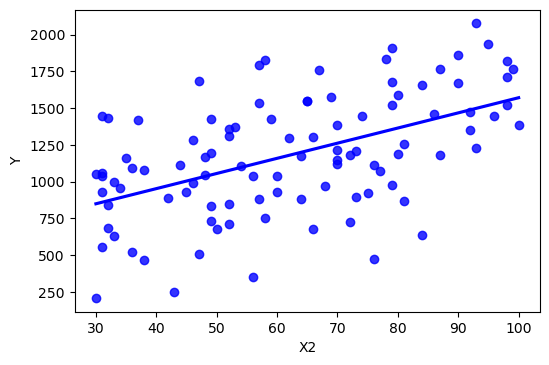

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     19.09
Date:                Wed, 04 May 2022   Prob (F-statistic):           1.02e-07
Time:                        00:43:06   Log-Likelihood:                -725.80
No. Observations:                 100   AIC:                             1458.
Df Residuals:                      97   BIC:                             1465.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        303.2529    212.868      1.425      0.1

/Users/liuweien/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


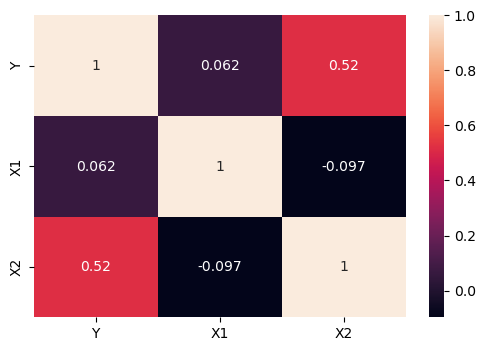

In [27]:
#Scatter Plots
y_var = df1['Y'].values
xnames = ['X1', 'X2']
for aname in xnames:
    x_var = df1[aname].values
    _ = sns.regplot(x = x_var, y = y_var, data = df1, color = 'b', ci = None)
    #_ = plt.plot(x, y, 'o', color = 'b')
    plt.xlabel(aname)
    plt.ylabel('Y')
    plt.show()
    
# Coefficient of Correlation
df1_2 = df1[['Y', 'X1', 'X2']]
corr1 = df1_2.corr()
corr1
_ = sns.heatmap(corr1, annot=True)

y_data = df1['Y']
X_data_ar = np.array([df1['X1'], df1['X2']])
X_data_T = X_data_ar.T
X_data = pd.DataFrame(X_data_T,columns = ['X1', 'X2'])
X_data2 = sm.add_constant(X_data)
olsmod = sm.OLS(y_data, X_data2)
result_reg = olsmod.fit()
print(result_reg.summary())

model: y = 14.9430 X1 + 10.5211 X2 + 303.2529

In [28]:
# Standardized Residuals
st, data, ss2 = sso.summary_table(result_reg, alpha=0.05)
print("Columns in data are: %s" % ss2)
#Predicted value
y_pre = data[:, 2]
#Studentized Residual
SD = data[:, 10]

Columns in data are: ['Obs', 'Dep Var\nPopulation', 'Predicted\nValue', 'Std Error\nMean Predict', 'Mean ci\n95% low', 'Mean ci\n95% upp', 'Predict ci\n95% low', 'Predict ci\n95% upp', 'Residual', 'Std Error\nResidual', 'Student\nResidual', "Cook's\nD"]


<h2>Perform the residual analysis.

Test 1: Normality Test

Hypothesis:<br>
H0: Errors are normally distributed.<br>
H1: Errors are not normally distributed.<br>

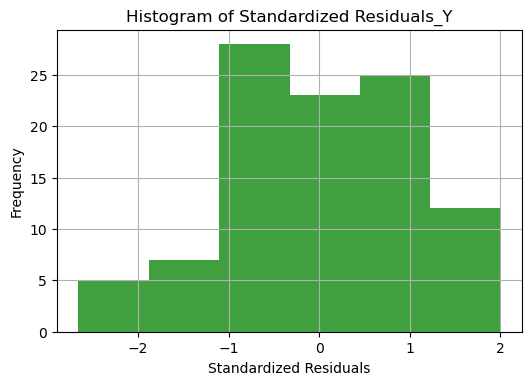

/Users/liuweien/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


 

Chi-squared test: statistics = 2.6000, p-value = 0.2725
Critical value = 5.9915 (defree of freedom = 2)
0.27253179303401337
Shapiro Test
Statistics=0.987, p=0.430


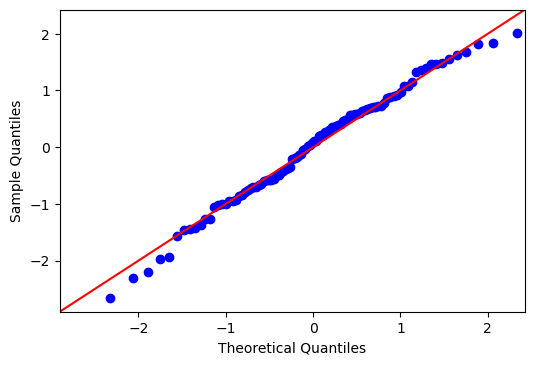

In [29]:
# Test 1: Normality Test
def Chi_Square_for_Normality(stand_res, N, a): 
    m = np.mean(stand_res)
    s = np.std(stand_res)    
    prob_bins = np.zeros((N + 1))
    z_bins = np.zeros((N + 1))
    z_bins[0] = -4
    z_bins[N] = 4
    for i in range(0, N+1):
        prob_bins[i] = i/N
    for j in range(1, N):
        z_bins[j] = m + stats.norm.isf(1 - prob_bins[j]) * s
    counts, bins = np.histogram(stand_res, bins=z_bins)
    nobs = counts.sum()
    prob_e = np.zeros((N))
    for i in range(1, N+1):
        prob_e[i - 1] = prob_bins[i] - prob_bins[i - 1]
    freq_e = nobs * prob_e
    freq_o = counts
    if np.sum(freq_e < 5) > 0:
        print("Rule of five is not met. ")
    else:
        chi_stat, pval = stats.chisquare(freq_o, freq_e)
        chi_pval = stats.chi2.sf(chi_stat, N - 3)
        print("Chi-squared test: statistics = %0.4f, p-value = %0.4f" % (chi_stat, chi_pval))
    df = freq_o.shape[0]-3
    crit_value = stats.chi2.ppf(1 - a, df)
    print("Critical value = %0.4f (defree of freedom = %d)" % (crit_value, df))
    return chi_pval

mu = np.mean(SD)
sigma = np.std(SD)

#_ = plt.hist(SD, bins = 'auto')
fig, ax = plt.subplots()
counts, bins, patches = plt.hist(SD, 6, density=False, facecolor='g', alpha=0.75)
plt.xlabel('Standardized Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Standardized Residuals_Y')
plt.grid(True)
bin_centers = [np.mean(k) for k in zip(bins[:-1], bins[1:])]
plt.show()

fig = sm.qqplot(SD, stats.norm, fit=True, line='45')
print(" \n")

chi2_pval = Chi_Square_for_Normality(SD, 5, 0.05) 
print(chi2_pval)

print('Shapiro Test')
stat, p = stats.shapiro(SD)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Because p_value = 0.2725 > a = 0.05, do not rejected H0. We can assume that errors are normally distributed.

Test 2: Homoscedasticity and Heteroscedasticity:

Hypothesis:<br>
H0: Homoscedasticity<br>
H1: Heteroscedasticity

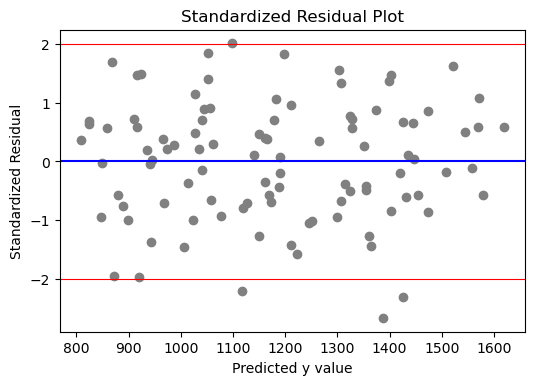

In [30]:
#Test 2: Homoscedasticity and Heteroscedasticity:
plt.plot(y_pre, SD, 'o', color = 'gray')
plt.axhline(y=2, color = 'red', lw = 0.8)
plt.axhline(y=0, color = 'blue')
plt.axhline(y=-2, color = 'red', lw = 0.8)
plt.title('Standardized Residual Plot')
plt.xlabel('Predicted y value')
plt.ylabel('Standardized Residual')
plt.show()

Do not rejected H0. We can assume that the variation is constant and the mean is around 0.

Test 3: Dependence of the Error Variable:<br>

Hypothesis:<br>
H0 : Randomness exists.<br>
H1 : Randomness does not exist.

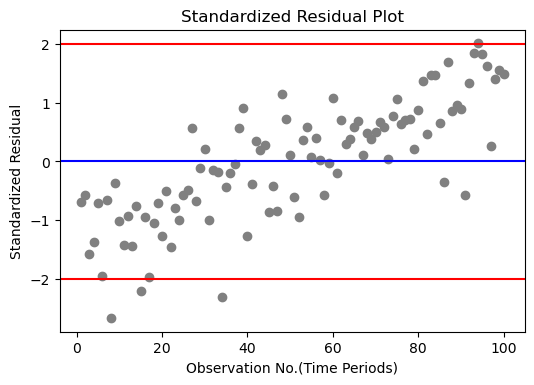

runs =  24
n1 =  50
n2 =  50
runs_exp =  51.0
stan_dev =  4.97468338163091
z =  -5.427481093509969
pval_z =  5.715491897869357e-08
p_value for Z-statistic=  5.715491897869357e-08


In [31]:
# Test 3: Dependence of the Error Variable:
def runsTest(l, l_median): 
    runs, n1, n2 = 1, 0, 0
    if(l[0]) >= l_median:
        n1 += 1   
    else:
        n2 += 1   
    for i in range(1, len(l)): 
        if (l[i] >= l_median and l[i-1] < l_median) or (l[i] < l_median and l[i-1] >= l_median):
            runs += 1  
        if(l[i]) >= l_median: 
            n1 += 1   
        else: 
            n2 += 1   
    runs_exp = ((2*n1*n2)/(n1+n2)) + 1
    stan_dev = math.sqrt((2*n1*n2*(2*n1*n2-n1-n2))/(((n1+n2)**2)*(n1+n2-1))) 
    z = (runs-runs_exp)/stan_dev
    pval_z = stats.norm.sf(abs(z)) * 2
    print('runs = ', runs)
    print('n1 = ', n1)
    print('n2 = ', n2)
    print('runs_exp = ', runs_exp)
    print('stan_dev = ', stan_dev)
    print('z = ', z)
    print('pval_z = ', pval_z)
    return pval_z

Id1 = data[:, 0]
plt.plot(Id1, SD, 'o', color = 'gray')
plt.axhline(y=0, color = 'blue')
plt.axhline(y=2, color = 'red')
plt.axhline(y=-2, color = 'red')
plt.title('Standardized Residual Plot')
plt.xlabel('Observation No.(Time Periods)')
plt.ylabel('Standardized Residual')
plt.show()

SD_median = statistics.median(SD)
Z_pval = runsTest(SD, SD_median)   
print('p_value for Z-statistic= ', Z_pval)

Because p-value = 5.715491897869357e-08 < a = 0.05, reject H0, in favor H1.
There is evidence to infer that the sample is not random.

<h2>Find the outliers and influential observations.

In [32]:
# Outliers
df1_3 = pd.DataFrame(SD,columns = ['SD'])
filter = (df1_3['SD'] < -2) | (df1_3['SD'] > 2)
print("Outliers by SD = \n")
print(df1_3['SD'].loc[filter])

# Influential Observation
H = np.matmul(X_data, np.linalg.solve(np.matmul(X_data.T, X_data), X_data.T))
df1['hii'] = np.diagonal(H)
df1_h = pd.DataFrame(df1['hii'])
k = result_reg.df_model
n = len(df1_h['hii'])
h_level = 3 * (k+1) / n 
print("h_level = ", h_level)
print(" \n")
filter = (df1_h['hii'] > h_level)
print("Influential Observations by hi = \n")
print(df1_h['hii'].loc[filter])

# Cook’s Distance
s2_e = result_reg.mse_resid
k = result_reg.df_model
y_a = data[:, 1]
y_f = data[:, 2]
h_i = df1['hii']
CD_arr = np.square(y_a - y_f) / s2_e / (k - 1) * h_i / np.square(1 - h_i)
CD = np.array(CD_arr)
df1_cd = pd.DataFrame(CD,columns = ['CD'])
display(df1_cd.head())
filter = (df1_cd['CD'] > 1 )
print("Influential Observations by Cook's Distances = \n")
print(df1_cd['CD'].loc[filter])

Outliers by SD = 

7    -2.662823
14   -2.204576
33   -2.298578
93    2.007644
Name: SD, dtype: float64
h_level =  0.09
 

Influential Observations by hi = 

Series([], Name: hii, dtype: float64)


/var/folders/l7/h_6mpd150zs9sx2xsxvg91_80000gn/T/ipykernel_12866/2384034953.py:8: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  H = np.matmul(X_data, np.linalg.solve(np.matmul(X_data.T, X_data), X_data.T))


,CD
0,0.005411
1,0.005622
2,0.025798
3,0.040884
4,0.004969


Influential Observations by Cook's Distances = 

Series([], Name: CD, dtype: float64)


Outliers ID: 8, 15, 34, 94.<br>
No influential observation.

<h2>Perform the regression diagnostics (multicollinearity and autocorrelation) analysis.

Multicollinearity analysis:

According to the OLS Regression Results chart and the correlation table above.<br>
The model is valid (F-statistic pvalue = 1.02e-07 < 0.05 rejects null hypothesis, r-squared is 0.282).<br>
X1 (0.194) p-value of T-test rejects null hypothesis, X2 (0.000) p-value of T-test do not rejects null hypothesis.<br>
The sign of the correlations are the same as the coefficents.<br>
Thus, there is no multicollinearity issue in this model.

Two-tail test for First Order Auto-Correlation:<br>
H0: The data are not first-order correlated<br>
H1: The data are first-order correlated

In [33]:
# autocorrelation
def Durbin_Watson_test(x):
    x_square_sum = np.vdot(x, x)
    print("x_square_sum = ", x_square_sum)
    size = x.size
    print("size = ", size)
    x_d = np.zeros((size))
    print("x_d = ", x_d)
    l_size = size - 1
    for i in range(l_size):
        x_d[i + 1] = x[i + 1] - x[i]
    print("x_d = ", x_d)
    d = np.vdot(x_d, x_d) / x_square_sum
    print("d = ", d)
    return(d)

d_w = Durbin_Watson_test(SD)
print(d_w)

x_square_sum =  99.79509589768428
size =  100
x_d =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
x_d =  [ 0.          0.12382389 -1.00039965  0.19389144  0.66414992 -1.22793526
  1.29062823 -2.01312506  2.30188989 -0.65831561 -0.39892323  0.48207678
 -0.50485805  0.68211618 -1.44573893  1.25480425 -1.01229201  0.91753459
  0.34632192 -0.57122928  0.76387998 -0.94333648  0.66241881 -0.21666551
  0.43536697  0.08403016  1.05596641 -1.24565855  0.55784883  0.3316783
 -1.2124081   0.85076831 -0.02577703 -2.12725394  1.86372245  0.23256813
  0.1611723   0.604032    0.35056536 -2.1806183   0.88294903  0.73931316
 -0.16261871  0.07952555 -1.12445945  0.42928018 -0.42650438  1.99131637
 -0.42201634 -0.61202913 -0.70979743 -0.33855587  1

(T = 100, K = 2, alpha = 0.05): dl = 1.634 , du = 1.715<br>
0 < d = 0.7758127492087871 < dl. Thus, there is enough evidence to infer that first order auto-correlation exists.

<h2>Alternative regression model:

New model strategy: Add a variable t as the time period.

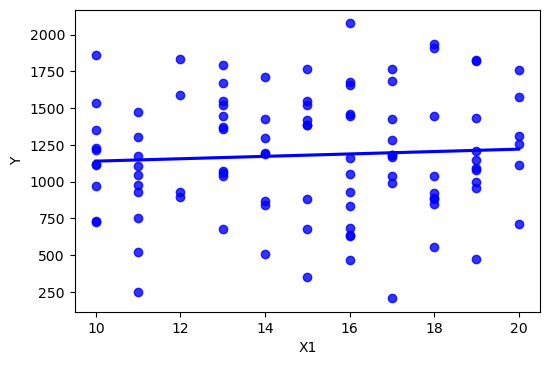

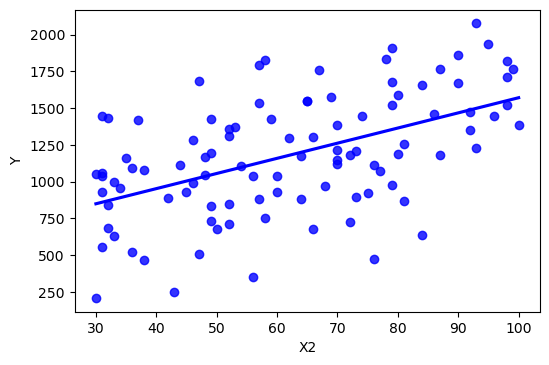

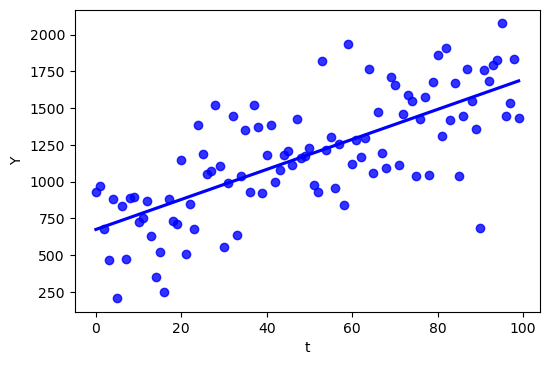

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     94.55
Date:                Wed, 04 May 2022   Prob (F-statistic):           1.49e-28
Time:                        00:43:06   Log-Likelihood:                -673.65
No. Observations:                 100   AIC:                             1355.
Df Residuals:                      96   BIC:                             1366.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.6437    128.803      0.153      0.8

/Users/liuweien/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


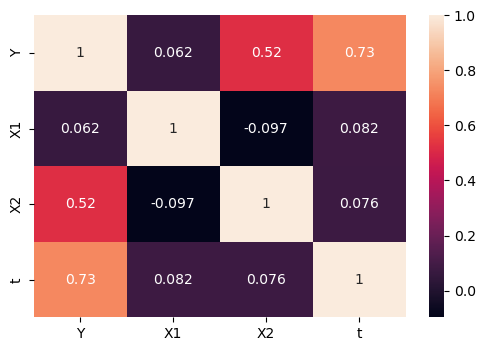

In [34]:
df1['t'] = range(0, 100)

#Scatter Plots
y_var = df1['Y'].values
xnames = ['X1', 'X2', 't']
for aname in xnames:
    x_var = df1[aname].values
    _ = sns.regplot(x = x_var, y = y_var, data = df1, color = 'b', ci = None)
    #_ = plt.plot(x, y, 'o', color = 'b')
    plt.xlabel(aname)
    plt.ylabel('Y')
    plt.show()
    
# Coefficient of Correlation
df1_2 = df1[['Y', 'X1', 'X2', 't']]
corr1 = df1_2.corr()
corr1
_ = sns.heatmap(corr1, annot=True)

y_data = df1['Y']
X_data_ar = np.array([df1['X1'], df1['X2'], df1['t']])
X_data_T = X_data_ar.T
X_data = pd.DataFrame(X_data_T,columns = ['X1', 'X2', 't'])
X_data2 = sm.add_constant(X_data)
olsmod = sm.OLS(y_data, X_data2)
result_reg = olsmod.fit()
print(result_reg.summary())

model: y = 6.7805 X1 + 9.3716 X2 + 9.6413t + 19.6437

In [35]:
# Standardized Residuals
st, data, ss2 = sso.summary_table(result_reg, alpha=0.05)
print("Columns in data are: %s" % ss2)
#Predicted value
y_pre = data[:, 2]
#Studentized Residual
SD = data[:, 10]

Columns in data are: ['Obs', 'Dep Var\nPopulation', 'Predicted\nValue', 'Std Error\nMean Predict', 'Mean ci\n95% low', 'Mean ci\n95% upp', 'Predict ci\n95% low', 'Predict ci\n95% upp', 'Residual', 'Std Error\nResidual', 'Student\nResidual', "Cook's\nD"]


<h2>Perform the residual analysis.

Test 1: Normality Test

Hypothesis:<br>
H0: Errors are normally distributed.<br>
H1: Errors are not normally distributed.<br>

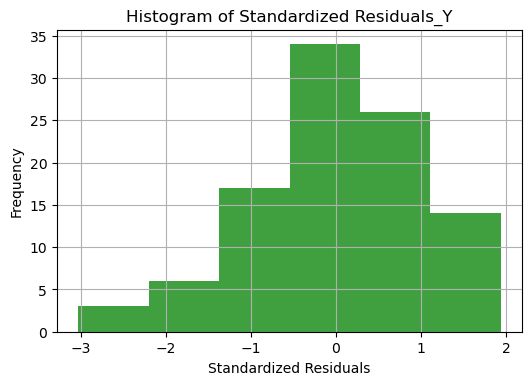

/Users/liuweien/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


 

Chi-squared test: statistics = 2.7000, p-value = 0.2592
Critical value = 5.9915 (defree of freedom = 2)
0.2592402606458912
Shapiro Test
Statistics=0.971, p=0.025


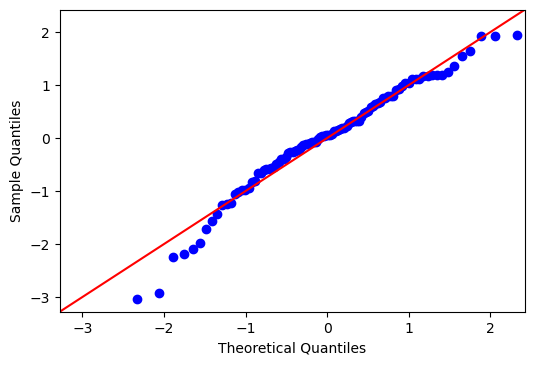

In [36]:
# Test 1: Normality Test
def Chi_Square_for_Normality(stand_res, N, a): 
    m = np.mean(stand_res)
    s = np.std(stand_res)    
    prob_bins = np.zeros((N + 1))
    z_bins = np.zeros((N + 1))
    z_bins[0] = -4
    z_bins[N] = 4
    for i in range(0, N+1):
        prob_bins[i] = i/N
    for j in range(1, N):
        z_bins[j] = m + stats.norm.isf(1 - prob_bins[j]) * s
    counts, bins = np.histogram(stand_res, bins=z_bins)
    nobs = counts.sum()
    prob_e = np.zeros((N))
    for i in range(1, N+1):
        prob_e[i - 1] = prob_bins[i] - prob_bins[i - 1]
    freq_e = nobs * prob_e
    freq_o = counts
    if np.sum(freq_e < 5) > 0:
        print("Rule of five is not met. ")
    else:
        chi_stat, pval = stats.chisquare(freq_o, freq_e)
        chi_pval = stats.chi2.sf(chi_stat, N - 3)
        print("Chi-squared test: statistics = %0.4f, p-value = %0.4f" % (chi_stat, chi_pval))
    df = freq_o.shape[0]-3
    crit_value = stats.chi2.ppf(1 - a, df)
    print("Critical value = %0.4f (defree of freedom = %d)" % (crit_value, df))
    return chi_pval

mu = np.mean(SD)
sigma = np.std(SD)

#_ = plt.hist(SD, bins = 'auto')
fig, ax = plt.subplots()
counts, bins, patches = plt.hist(SD, 6, density=False, facecolor='g', alpha=0.75)
plt.xlabel('Standardized Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Standardized Residuals_Y')
plt.grid(True)
bin_centers = [np.mean(k) for k in zip(bins[:-1], bins[1:])]
plt.show()

fig = sm.qqplot(SD, stats.norm, fit=True, line='45')
print(" \n")

chi2_pval = Chi_Square_for_Normality(SD, 5, 0.05) 
print(chi2_pval)

print('Shapiro Test')
stat, p = stats.shapiro(SD)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Because p_value = 0.2592 > a = 0.05, do not rejected H0. We can assume that errors are normally distributed.

Test 2: Homoscedasticity and Heteroscedasticity:

Hypothesis:<br>
H0: Homoscedasticity<br>
H1: Heteroscedasticity

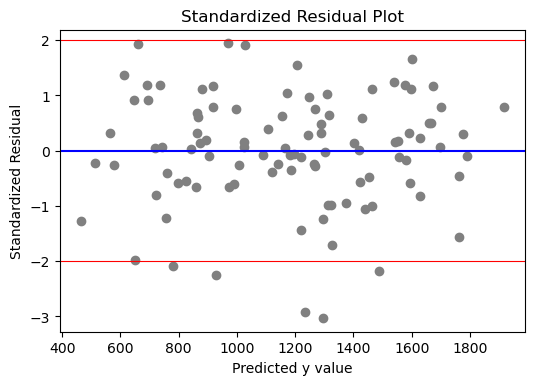

In [37]:
#Test 2: Homoscedasticity and Heteroscedasticity:
plt.plot(y_pre, SD, 'o', color = 'gray')
plt.axhline(y=2, color = 'red', lw = 0.8)
plt.axhline(y=0, color = 'blue')
plt.axhline(y=-2, color = 'red', lw = 0.8)
plt.title('Standardized Residual Plot')
plt.xlabel('Predicted y value')
plt.ylabel('Standardized Residual')
plt.show()

Do not rejected H0. We can assume that the variation is constant and the mean is around 0.

Test 3: Dependence of the Error Variable:<br>

Hypothesis:<br>
H0 : Randomness exists.<br>
H1 : Randomness does not exist.

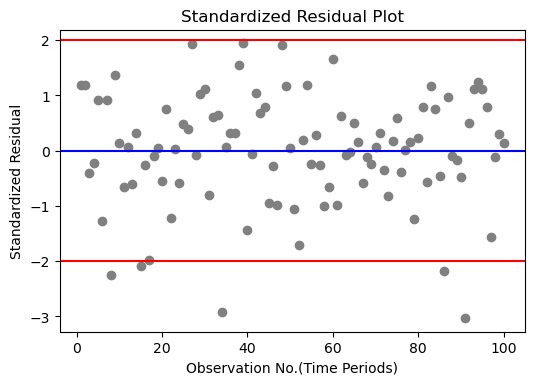

runs =  51
n1 =  50
n2 =  50
runs_exp =  51.0
stan_dev =  4.97468338163091
z =  0.0
pval_z =  1.0
p_value for Z-statistic=  1.0


In [38]:
# Test 3: Dependence of the Error Variable:
def runsTest(l, l_median): 
    runs, n1, n2 = 1, 0, 0
    if(l[0]) >= l_median:
        n1 += 1   
    else:
        n2 += 1   
    for i in range(1, len(l)): 
        if (l[i] >= l_median and l[i-1] < l_median) or (l[i] < l_median and l[i-1] >= l_median):
            runs += 1  
        if(l[i]) >= l_median: 
            n1 += 1   
        else: 
            n2 += 1   
    runs_exp = ((2*n1*n2)/(n1+n2)) + 1
    stan_dev = math.sqrt((2*n1*n2*(2*n1*n2-n1-n2))/(((n1+n2)**2)*(n1+n2-1))) 
    z = (runs-runs_exp)/stan_dev
    pval_z = stats.norm.sf(abs(z)) * 2
    print('runs = ', runs)
    print('n1 = ', n1)
    print('n2 = ', n2)
    print('runs_exp = ', runs_exp)
    print('stan_dev = ', stan_dev)
    print('z = ', z)
    print('pval_z = ', pval_z)
    return pval_z

Id1 = data[:, 0]
plt.plot(Id1, SD, 'o', color = 'gray')
plt.axhline(y=0, color = 'blue')
plt.axhline(y=2, color = 'red')
plt.axhline(y=-2, color = 'red')
plt.title('Standardized Residual Plot')
plt.xlabel('Observation No.(Time Periods)')
plt.ylabel('Standardized Residual')
plt.show()

SD_median = statistics.median(SD)
Z_pval = runsTest(SD, SD_median)   
print('p_value for Z-statistic= ', Z_pval)

Because p-value = 1.0 > a = 0.05, do not reject H0.
There is not evidence to infer that the sample is not random.

All conditions satisfied.

<h2>Find the outliers and influential observations.

In [39]:
# Outliers
df1_3 = pd.DataFrame(SD,columns = ['SD'])
filter = (df1_3['SD'] < -2) | (df1_3['SD'] > 2)
print("Outliers by SD = \n")
print(df1_3['SD'].loc[filter])

# Influential Observation
H = np.matmul(X_data, np.linalg.solve(np.matmul(X_data.T, X_data), X_data.T))
df1['hii'] = np.diagonal(H)
df1_h = pd.DataFrame(df1['hii'])
k = result_reg.df_model
n = len(df1_h['hii'])
h_level = 3 * (k+1) / n 
print("h_level = ", h_level)
print(" \n")
filter = (df1_h['hii'] > h_level)
print("Influential Observations by hi = \n")
print(df1_h['hii'].loc[filter])

# Cook’s Distance
s2_e = result_reg.mse_resid
k = result_reg.df_model
y_a = data[:, 1]
y_f = data[:, 2]
h_i = df1['hii']
CD_arr = np.square(y_a - y_f) / s2_e / (k - 1) * h_i / np.square(1 - h_i)
CD = np.array(CD_arr)
df1_cd = pd.DataFrame(CD,columns = ['CD'])
display(df1_cd.head())
filter = (df1_cd['CD'] > 1 )
print("Influential Observations by Cook's Distances = \n")
print(df1_cd['CD'].loc[filter])

Outliers by SD = 

7    -2.252888
14   -2.089256
33   -2.922691
85   -2.180681
90   -3.028743
Name: SD, dtype: float64
h_level =  0.12
 

Influential Observations by hi = 

Series([], Name: hii, dtype: float64)


/var/folders/l7/h_6mpd150zs9sx2xsxvg91_80000gn/T/ipykernel_12866/2384034953.py:8: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  H = np.matmul(X_data, np.linalg.solve(np.matmul(X_data.T, X_data), X_data.T))


,CD
0,0.030444
1,0.024503
2,0.003141
3,0.001074
4,0.013652


Influential Observations by Cook's Distances = 

Series([], Name: CD, dtype: float64)


Outliers ID: 8, 15, 34, 86, 91.<br>
No influential observation.

<h2>Perform the regression diagnostics (multicollinearity and autocorrelation) analysis.

Multicollinearity analysis:

According to the OLS Regression Results chart and the correlation table above.<br>
The model is valid (F-statistic pvalue = 1.49e-28 < 0.05 rejects null hypothesis, r-squared is 0.747).<br>
X1 (0.324) p-value of T-test rejects null hypothesis, X2 (0.000), t (0.000) p-value of T-test do not rejects null hypothesis.<br>
The sign of the correlations are the same as the coefficents.<br>
Thus, there is no multicollinearity issue in this model.

Two-tail test for First Order Auto-Correlation:<br>
H0: The data are not first-order correlated<br>
H1: The data are first-order correlated

In [40]:
# autocorrelation
def Durbin_Watson_test(x):
    x_square_sum = np.vdot(x, x)
    print("x_square_sum = ", x_square_sum)
    size = x.size
    print("size = ", size)
    x_d = np.zeros((size))
    print("x_d = ", x_d)
    l_size = size - 1
    for i in range(l_size):
        x_d[i + 1] = x[i + 1] - x[i]
    print("x_d = ", x_d)
    d = np.vdot(x_d, x_d) / x_square_sum
    print("d = ", d)
    return(d)

d_w = Durbin_Watson_test(SD)
print(d_w)

x_square_sum =  99.9738632864937
size =  100
x_d =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
x_d =  [ 0.         -0.00724353 -1.58622858  0.18007596  1.13208962 -2.17419147
  2.18447088 -3.1726906   3.62055431 -1.23477932 -0.79294612  0.71979368
 -0.65915185  0.92523052 -2.41506929  1.82595681 -1.71857721  1.88217469
  0.14803548 -0.59490872  1.29695234 -1.97451107  1.25770206 -0.62309347
  1.0647745  -0.07750362  1.53506758 -2.0044474   1.1030932   0.09291912
 -1.92787558  1.41686448  0.04064547 -3.57670407  2.98566529  0.25810382
 -0.00785933  1.23275654  0.39423397 -3.38068369  1.37583504  1.10126275
 -0.36137125  0.11313661 -1.7383296   0.67407832 -0.70269912  2.8969867
 -0.75306104 -1.10902891 -1.11456341 -0.65267994  1.

(T = 100, K = 3, alpha = 0.05): dl = 1.613 , du = 1.736<br>
2 < d = 2.1259112181628956 < (4 - du). Thus, there is not enough evidence to infer that first order auto-correlation exists.

Comparision of the two models:<br>
The new model satisfies all the regression diagnostics and residual analysis, while the original one only satisfies part of it.<br>
Also, the new model has a much higher r-squared value, which implies a much better estimation when using the new regression line.<br>
74.7% of the variation in Y is explained by this regression line of the three independent variables and 25.3% remains unexplained.